In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# Load data
df = pd.read_csv('/content/advertising.csv')
print(df.head())
print("\nData Summary:")
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Data Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


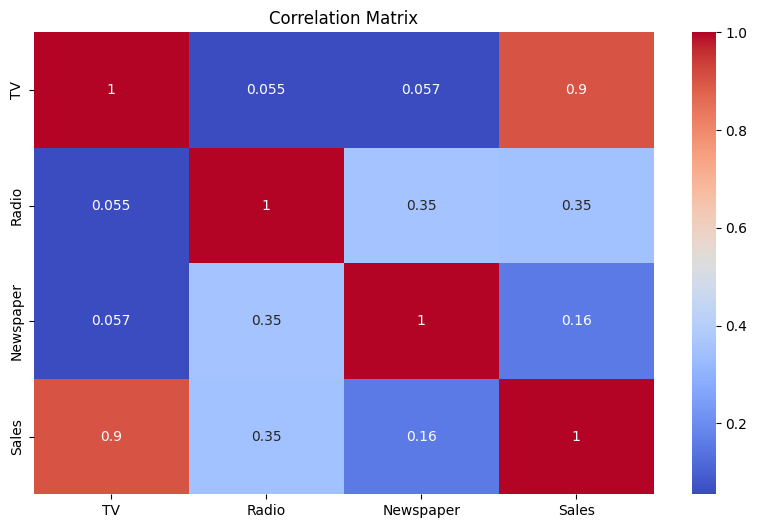

In [6]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

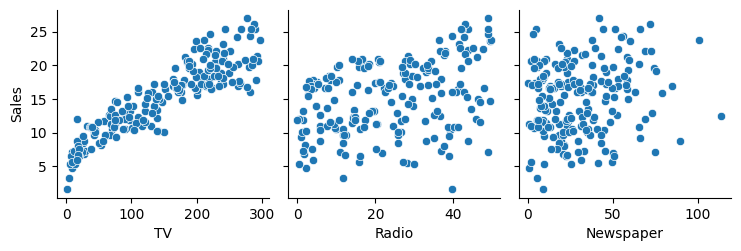

In [7]:
# Pairplot
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()


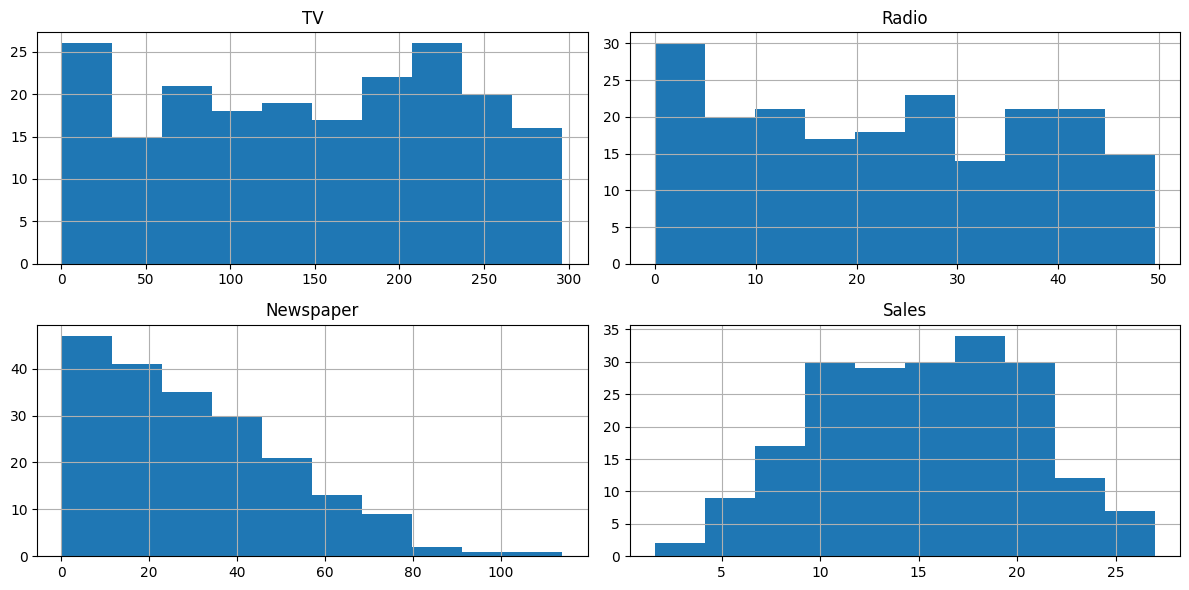

In [8]:
# Distribution plots
df.hist(figsize=(12,6))
plt.tight_layout()
plt.show()

#Data preprocessing

In [9]:
# Split data into features and target
X = df.drop('Sales', axis=1)
y = df['Sales']


In [10]:
# Split into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model building

In [11]:
# Create and train model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [12]:
# Make predictions
y_pred = lr.predict(X_test)


In [13]:
# Evaluate model
print("\nModel Evaluation:")
print(f"R-squared: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"Coefficients:\nTV: {lr.coef_[0]:.3f}\nRadio: {lr.coef_[1]:.3f}\nNewspaper: {lr.coef_[2]:.3f}")


Model Evaluation:
R-squared: 0.906
RMSE: 1.705
Coefficients:
TV: 0.055
Radio: 0.101
Newspaper: 0.004


#Model visaulization

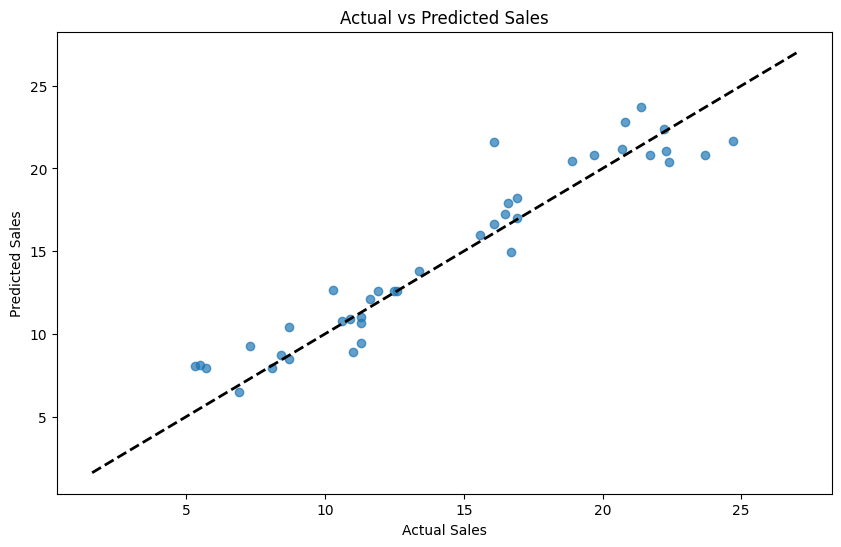

In [14]:
# Actual vs Predicted plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

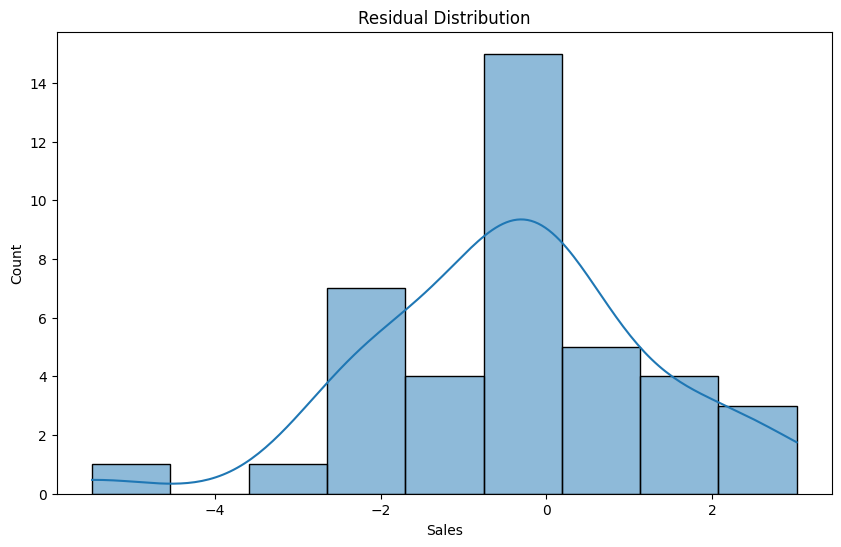

In [15]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

#Model Interpretation

In [16]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Impact Analysis:")
print(coefficients)


Feature Impact Analysis:
     Feature  Coefficient
1      Radio     0.100945
0         TV     0.054509
2  Newspaper     0.004337
